# First look: USGS Stage/Discharge Gages,  Missississippi East

### Overview: Download Data using the USGS Data Retrieval (R Package )

#### [CRAN](https://cran.r-project.org/web/packages/dataRetrieval/dataRetrieval.pdf)
#### [USGS Package Usage Overview](https://owi.usgs.gov/R/dataRetrieval.html)
#### [GitHub Repo](https://github.com/USGS-R/dataRetrieval)

In [1]:
require(dataRetrieval)
require(curl)
library(repr)
library(maps)
library(ggplot2)
library(leaflet)
library(skimr)
library(htmlwidgets)
options(repr.matrix.max.cols = 40)

Loading required package: dataRetrieval
Loading required package: curl


## Select states of interest & search for available USGS gages
 - Pull metadata from stations with flow & stage records
 - Plot

[1] "NY"


agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,colocated,queryTime,gtype
USGS,04213305,TWENTY MILE CREEK AT SOUTH RIPLEY NY,ST,42.20422,-79.70199,FALSE,2018-06-10 09:24:07,00060
USGS,03015330,BROKENSTRAW CREEK AT CLYMER NY,ST,42.00978,-79.61644,FALSE,2018-06-10 09:24:07,00060
USGS,04213319,CHAUTAUQUA CREEK BELOW WESTFIELD NY,ST,42.33081,-79.58992,FALSE,2018-06-10 09:24:07,00060
USGS,04213318,CHAUTAUQUA CREEK AT WESTFIELD NY,ST,42.31672,-79.57894,FALSE,2018-06-10 09:24:07,00060
USGS,04213315,CHAUTAUQUA CREEK ABOVE WESTFIELD NY,ST,42.30867,-79.57727,FALSE,2018-06-10 09:24:07,00060
USGS,04213333,BOURNES CREEK NEAR WESTFIELD NY,ST,42.35700,-79.55116,FALSE,2018-06-10 09:24:07,00060


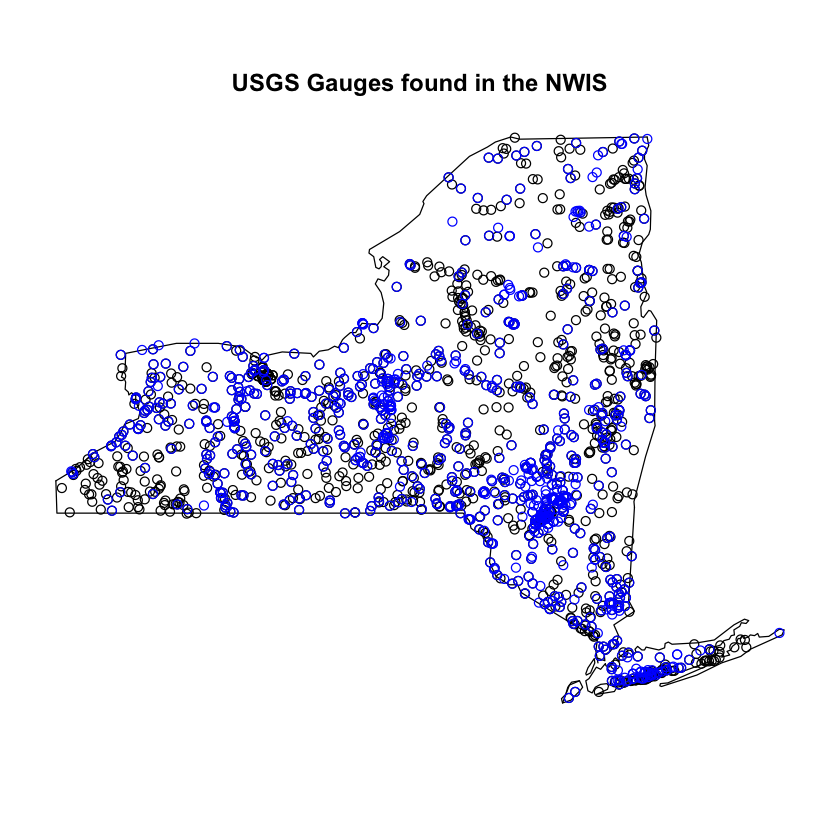

In [2]:
# Select states to refine search 
states <- c("NY")

#--- Assign parameter of interest
stageCode <- "00065"
flowCode <- "00060"
#bBox not working directly
#stage_sites <- whatNWISsites(bBox= bbox, parameterCd=stageCode)

stage_sites <- data.frame()
flow_sites <- data.frame()

for(state in states){
    print(state)
    tmp <- whatNWISsites(stateCd=state ,parameterCd=stageCode)
    stage_sites <- rbind(tmp, stage_sites)

    tmp <- whatNWISsites(stateCd=state ,parameterCd=flowCode)
    flow_sites <- rbind(tmp, flow_sites)   
}

stage_sites$gtype = stageCode
flow_sites$gtype = flowCode

map('state', region = c('new york'))
#map('state', region = c('mississippi'))
title(main="USGS Gauges found in the NWIS")
points(x=flow_sites$dec_long_va, 
       y=flow_sites$dec_lat_va,
      col='black')

points(x=stage_sites$dec_long_va, 
       y=stage_sites$dec_lat_va,
      col='blue')

head(flow_sites)

## Refine gauge list using bounding box
 - Select gauges within a refined areas of interest & given a record count threshold

In [3]:
# Bounding box
bbox <- c(42.0, -76.25, 42.25, -75.5)

df <- rbind(stage_sites, flow_sites)
df <- df[df$dec_lat_va <= bbox[3] & df$dec_lat_va >= bbox[1],]
df <- df[df$dec_long_va >= bbox[2] & df$dec_long_va <= bbox[4],]

s <- df[df['gtype'] == stageCode,]
q <- df[df['gtype'] == flowCode,]

sort.q <- with(q,  q[order(station_nm) , ])
print('Flow Gauges')
sort.q

[1] "Flow Gauges"


,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,colocated,queryTime,gtype
1320,USGS,01513820,APALACHIN CREEK AT APALACHIN NY,ST,42.06230,-76.14882,FALSE,2018-06-10 09:24:07,00060
1404,USGS,01502712,BELDEN BROOK AT HARPURSVILLE NY,ST,42.18063,-75.62352,FALSE,2018-06-10 09:24:07,00060
1424,USGS,01502698,BUMPS CREEK AT AFTON NY,ST,42.23286,-75.53574,FALSE,2018-06-10 09:24:07,00060
1364,USGS,01512797,CASTLE CREEK AT GLEN CASTLE NY,ST,42.17952,-75.90159,FALSE,2018-06-10 09:24:07,00060
1375,USGS,01512500,CHENANGO RIVER NEAR CHENANGO FORKS NY,ST,42.21806,-75.84833,FALSE,2018-06-10 09:24:07,00060
1291,USGS,01513990,DOOLITTLE CREEK AT WELTONVILLE NY,ST,42.19535,-76.24715,FALSE,2018-06-10 09:24:07,00060
1358,USGS,01513100,FULLER HOLLOW CREEK AT JOHNSON CITY NY,ST,42.09674,-75.96520,FALSE,2018-06-10 09:24:07,00060
1357,USGS,01513250,LITTLE CHOCONUT CREEK AT OAKDALE NY,ST,42.11258,-75.97048,FALSE,2018-06-10 09:24:07,00060
1300,USGS,01513830,LITTLE NANTICOKE CREEK NEAR OWEGO NY,ST,42.09230,-76.21688,FALSE,2018-06-10 09:24:07,00060
1382,USGS,01502899,LITTLE SNAKE CREEK AT CONKLIN NY,ST,42.03035,-75.80852,FALSE,2018-06-10 09:24:07,00060


# Let's take a look at the points on a map

In [12]:
pal <- colorFactor(c("black","blue"), domain = c("00060", "00065"))

m <- leaflet(
    
     data=na.omit(df), height=500, width=1000) %>%  
     addTiles('http://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png') %>%
     addCircleMarkers(~dec_long_va,~dec_lat_va, color = ~pal(gtype),
                      radius=5, stroke=FALSE,fillOpacity = 0.9, opacity = 0.8,
                    popup=~c(station_nm)) %>%
     addLegend("topright", pal = pal, values = ~gtype,
                title = "USGS Gages in Study Area",
                labFormat = labelFormat(prefix = "")
      )

head(df,2)
saveWidget(m, 'overview_map.html')
m

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,colocated,queryTime,gtype
266,USGS,01513820,APALACHIN CREEK AT APALACHIN NY,ST,42.06230,-76.14882,FALSE,2018-06-10 09:24:06,00065
287,USGS,01513500,SUSQUEHANNA RIVER AT VESTAL NY,ST,42.09083,-76.05611,FALSE,2018-06-10 09:24:06,00065


HTML widgets cannot be represented in plain text (need html)

Note: If gauges do not display on map, 
[Click Here ](sus_map.html) for Stanadlone Map of Gauges in Area of Interest

## Pull Metadata from gauges within area of interest

In [5]:
s_meta <- whatNWISdata(siteNumber=s$site_no, parameterCd=stageCode)
q_meta <- whatNWISdata(siteNumber=q$site_no, parameterCd=flowCode)
head(s_meta, 2)

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,alt_va,alt_acy_va,alt_datum_cd,huc_cd,data_type_cd,parm_cd,stat_cd,ts_id,loc_web_ds,medium_grp_cd,parm_grp_cd,srs_id,access_cd,begin_date,end_date,count_nu
7,USGS,01502720,SAGE CREEK AT OUAQUAGA NY,ST,42.11786,-75.65574,S,NAD83,NA,NA,NA,02050101,qw,00065,NA,0,NA,wat,PHY,17164583,0,1970-07-29,1970-07-29,1
50,USGS,01502730,OCCANUM CREEK AT WINDSOR NY,ST,42.08175,-75.64018,S,NAD83,NA,NA,NA,02050101,qw,00065,NA,0,NA,wat,PHY,17164583,0,1970-08-10,1970-08-10,1


## Subset gauge data by river
Note: In metadata table __*data_type_cd*__:

    uv = instantaneous data
    dv = daily data

In [13]:
river <- "SUSQUEHANNA"
idx <- grep(river,q_meta$station_nm)
sus_q_gages <- q_meta[idx,]#$station_nm

idx <- grep(river,s_meta$station_nm)
sus_s_gages <- s_meta[idx,]#$station_nm

sus_q_gages[(sus_q_gages["count_nu"] > 20),]

leaflet(data=sus_s_gages, height=500, width=1000) %>%  
    addTiles('http://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png') %>%
    addCircleMarkers(~dec_long_va,~dec_lat_va, color = "blue",
                      radius=10, stroke=FALSE, fillOpacity = 0.9, 
                      opacity = 0.8, popup=~c(site_no)) 

saveWidget(m, 'sus_map.html')

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,alt_va,alt_acy_va,alt_datum_cd,huc_cd,data_type_cd,parm_cd,stat_cd,ts_id,loc_web_ds,medium_grp_cd,parm_grp_cd,srs_id,access_cd,begin_date,end_date,count_nu
172,USGS,01502731,SUSQUEHANNA RIVER AT WINDSOR NY,ST,42.07472,-75.63778,S,NAD83,900,10,NGVD29,02050101,dv,00060,00003,105433,NA,wat,NA,1645423,0,2009-10-01,2018-06-09,3174
175,USGS,01502731,SUSQUEHANNA RIVER AT WINDSOR NY,ST,42.07472,-75.63778,S,NAD83,900,10,NGVD29,02050101,uv,00060,NA,107429,NA,wat,NA,1645423,0,2009-10-01,2018-06-10,3174
241,USGS,01503000,SUSQUEHANNA RIVER AT CONKLIN NY,ST,42.03528,-75.80306,S,NAD83,841.04,.01,NGVD29,02050101,dv,00060,00003,105434,NA,wat,NA,1645423,0,1913-01-01,2018-06-09,38511
454,USGS,01503000,SUSQUEHANNA RIVER AT CONKLIN NY,ST,42.03528,-75.80306,S,NAD83,841.04,.01,NGVD29,02050101,uv,00060,NA,107431,NA,wat,NA,1645423,0,1987-06-01,2018-06-10,11332
846,USGS,01513500,SUSQUEHANNA RIVER AT VESTAL NY,ST,42.09083,-76.05611,S,NAD83,798.72,.01,NAVD88,02050103,dv,00060,00003,105471,NA,wat,NA,1645423,0,1938-09-30,2018-06-09,13673
941,USGS,01513500,SUSQUEHANNA RIVER AT VESTAL NY,ST,42.09083,-76.05611,S,NAD83,798.72,.01,NAVD88,02050103,uv,00060,NA,107463,NA,wat,NA,1645423,0,2007-10-20,2018-06-10,3886


HTML widgets cannot be represented in plain text (need html)

Note: If gauges do not display on map, 
[Click Here ](sus_map.html)  at Susquehanna River

## Download Flow Data & Plot

agency_cd,site_no,Date,Flow,Flow_cd
USGS,01502731,2009-10-01,1710,A
USGS,01502731,2009-10-02,1510,A


Skim summary statistics  
 n obs: 3015    
 n variables: 5    

Variable type: character

|variable  |missing |complete |n    |min |max |empty |n_unique |
|:---------|:-------|:--------|:----|:---|:---|:-----|:--------|
|agency_cd |0       |3015     |3015 |4   |4   |0     |1        |
|Flow_cd   |0       |3015     |3015 |1   |3   |0     |4        |
|site_no   |0       |3015     |3015 |8   |8   |0     |1        |

Variable type: Date

|variable |missing |complete |n    |min        |max        |median     |n_unique |
|:--------|:-------|:--------|:----|:----------|:----------|:----------|:--------|
|Date     |0       |3015     |3015 |2009-10-01 |2018-01-01 |2013-11-16 |3015     |

Variable type: numeric

|variable |missing |complete |n    |mean    |sd      |p0  |p25  |p50  |p75  |p100  |hist     |
|:--------|:-------|:--------|:----|:-------|:-------|:---|:----|:----|:----|:-----|:--------|
|Flow     |0       |3015     |3015 |3407.97 |3724.72 |277 |1180 |2310 |4250 |53400 |▇▁▁▁▁▁▁▁ |


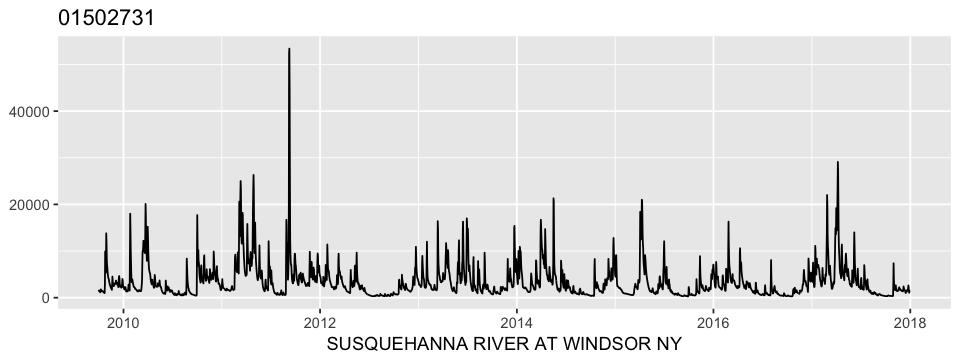

In [9]:
qsites <- unique(sus_q_gages$site_no)

siteNo <- qsites[1]
gage_data <- readNWISdv(siteNumbers=siteNo, parameterCd=flowCode, startDate = "1900-01-01", endDate = "2018-01-01")
gage_data <- renameNWISColumns(gage_data)
head(gage_data,2)

parameterInfo <- attr(gage_data, "variableInfo")
siteInfo <- attr(gage_data, "siteInfo")

options(repr.plot.width=8, repr.plot.height=3)
ts <- ggplot(data = gage_data,
             aes(Date, Flow)) +
      geom_line()+
      xlab(siteInfo$station_nm) +
      ylab(parameterInfo$parameter_desc) +
      ggtitle(siteNo)
ts 
skim(gage_data) %>% skimr::kable()

agency_cd,site_no,Date,Flow,Flow_cd
USGS,01503000,1913-01-01,5720,A
USGS,01503000,1913-01-02,4640,A


Skim summary statistics  
 n obs: 38352    
 n variables: 5    

Variable type: character

|variable  |missing |complete |n     |min |max |empty |n_unique |
|:---------|:-------|:--------|:-----|:---|:---|:-----|:--------|
|agency_cd |0       |38352    |38352 |4   |4   |0     |1        |
|Flow_cd   |0       |38352    |38352 |1   |3   |0     |4        |
|site_no   |0       |38352    |38352 |8   |8   |0     |1        |

Variable type: Date

|variable |missing |complete |n     |min        |max        |median     |n_unique |
|:--------|:-------|:--------|:-----|:----------|:----------|:----------|:--------|
|Date     |0       |38352    |38352 |1913-01-01 |2018-01-01 |1965-07-02 |38352    |

Variable type: numeric

|variable |missing |complete |n     |mean    |sd      |p0  |p25 |p50  |p75  |p100  |hist     |
|:--------|:-------|:--------|:-----|:-------|:-------|:---|:---|:----|:----|:-----|:--------|
|Flow     |0       |38352    |38352 |3655.94 |4606.52 |105 |905 |2130 |4600 |72100 |▇▁▁▁▁▁

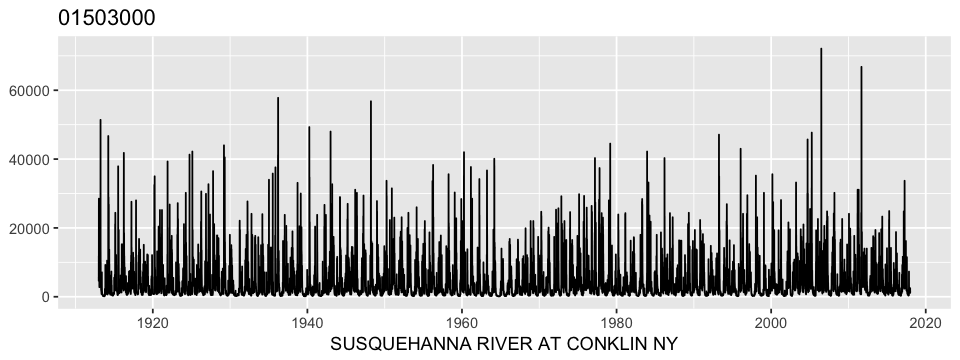

In [10]:
siteNo <- qsites[2]
gage_data <- readNWISdv(siteNumbers=siteNo, parameterCd=flowCode, startDate = "1900-01-01", endDate = "2018-01-01")
gage_data <- renameNWISColumns(gage_data)
head(gage_data,2)

parameterInfo <- attr(gage_data, "variableInfo")
siteInfo <- attr(gage_data, "siteInfo")

options(repr.plot.width=8, repr.plot.height=3)
ts <- ggplot(data = gage_data,
             aes(Date, Flow)) +
      geom_line()+
      xlab(siteInfo$station_nm) +
      ylab(parameterInfo$parameter_desc) +
      ggtitle(siteNo)
ts 
skim(gage_data) %>% skimr::kable()

agency_cd,site_no,Date,Flow,Flow_cd
USGS,01513500,1938-09-30,7150,A
USGS,01513500,1938-10-01,6220,A


Skim summary statistics  
 n obs: 13514    
 n variables: 5    

Variable type: character

|variable  |missing |complete |n     |min |max |empty |n_unique |
|:---------|:-------|:--------|:-----|:---|:---|:-----|:--------|
|agency_cd |0       |13514    |13514 |4   |4   |0     |1        |
|Flow_cd   |0       |13514    |13514 |1   |3   |0     |4        |
|site_no   |0       |13514    |13514 |8   |8   |0     |1        |

Variable type: Date

|variable |missing |complete |n     |min        |max        |median     |n_unique |
|:--------|:-------|:--------|:-----|:----------|:----------|:----------|:--------|
|Date     |0       |13514    |13514 |1938-09-30 |2018-01-01 |1957-03-30 |13514    |

Variable type: numeric

|variable |missing |complete |n     |mean    |sd     |p0  |p25  |p50  |p75  |p100   |hist     |
|:--------|:-------|:--------|:-----|:-------|:------|:---|:----|:----|:----|:------|:--------|
|Flow     |0       |13514    |13514 |6310.77 |8040.4 |233 |1540 |3600 |7840 |124000 |▇▁▁

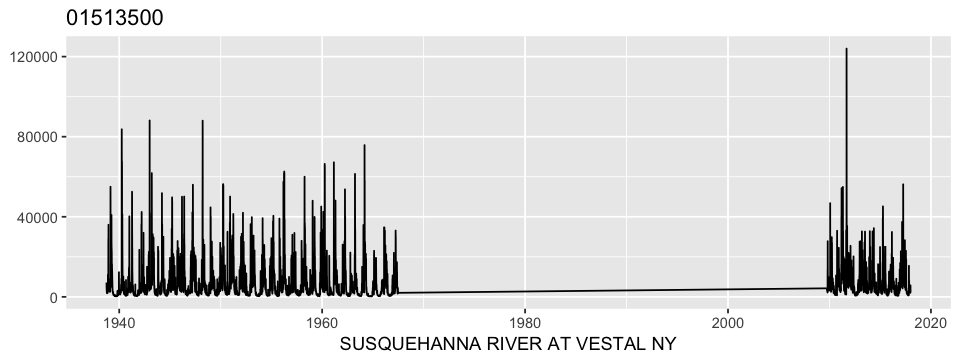

In [11]:
siteNo <- qsites[4]
gage_data <- readNWISdv(siteNumbers=siteNo, parameterCd=flowCode, startDate = "1900-01-01", endDate = "2018-01-01")
gage_data <- renameNWISColumns(gage_data)
head(gage_data,2)

parameterInfo <- attr(gage_data, "variableInfo")
siteInfo <- attr(gage_data, "siteInfo")

options(repr.plot.width=8, repr.plot.height=3)
ts <- ggplot(data = gage_data,
             aes(Date, Flow)) +
      geom_line()+
      xlab(siteInfo$station_nm) +
      ylab(parameterInfo$parameter_desc) +
      ggtitle(siteNo)
ts 
skim(gage_data) %>% skimr::kable()